In [1]:
from urllib import parse
from ast import literal_eval
import requests
import pandas as pd

class FinanceManager:
    def __init__(self):
        self.data_dict_list = []

    def get_sise_years(self, code,num_years=3):
        import datetime
        end_time = datetime.date.today()
        start_time = end_time - datetime.timedelta(days=365 * num_years)
        start_time_str = start_time.strftime('%Y%m%d')
        end_time_str = end_time.strftime('%Y%m%d')

        get_param = {
            'symbol': code,
            'requestType': 1,
            'startTime': start_time_str,
            'endTime': end_time_str,
            'timeframe': 'day'
        }
        get_param = parse.urlencode(get_param)
        url = "https://api.finance.naver.com/siseJson.naver?%s" % get_param
        response = requests.get(url)
        data_list = literal_eval(response.text.strip())

        for data in data_list:
            data_dict = {
                '날짜': data[0],
                '시가': data[1],
                '고가': data[2],
                '저가': data[3],
                '종가': data[4],
            }
            self.data_dict_list.append(data_dict)
        return self.data_dict_list

    def get_datas(self, data_type):
        data_list = []
        for data_dict in self.data_dict_list[1:]:
            data_list.append(data_dict[data_type])

        return data_list

    def get_sise_days(self, code, days=30):
        import datetime
        end_time = datetime.date.today()
        start_time = end_time - datetime.timedelta(days)
        start_time_str = start_time.strftime('%Y%m%d')
        end_time_str = end_time.strftime('%Y%m%d')

        get_param = {
            'symbol': code,
            'requestType': 1,
            'startTime': start_time_str,
            'endTime': end_time_str,
            'timeframe': 'day'
        }
        get_param = parse.urlencode(get_param)
        url = "https://api.finance.naver.com/siseJson.naver?%s" % get_param
        response = requests.get(url)
        data_list = literal_eval(response.text.strip())

        for data in data_list:
            data_dict = {
                '날짜': data[0],
                '시가': data[1],
                '고가': data[2],
                '저가': data[3],
                '종가': data[4],
            }
            self.data_dict_list.append(data_dict)
        return self.data_dict_list

    def list_to_df(self, data):
        df = pd.DataFrame(data)
        df = df.rename(columns={'날짜': 'Date', '시가': 'Open', '고가': 'High', '저가': 'Low', '종가': 'Close'})
        return df

    def save_to_csv(self, df, filename):
        df.to_csv(filename, index=False)

    def load_from_csv(self, filename):
        df = pd.read_csv(filename)
        return df

if __name__ == "__main__":
    fm = FinanceManager()
    data = fm.get_sise_days('005930',15)

    df = fm.list_to_df(data)

    # CSV 파일로 저장
    fm.save_to_csv(df, 'stock_data.csv')

    # CSV 파일 불러오기
    loaded_df = fm.load_from_csv('stock_data.csv')
    print(loaded_df)

        Date   Open   High    Low  Close
0         날짜     시가     고가     저가     종가
1   20231106  69800  70900  69300  70900
2   20231107  70600  70900  70000  70900
3   20231108  71300  71400  69700  69900
4   20231109  69900  70800  69600  70300
5   20231110  70000  70500  69500  70500
6   20231113  71300  71300  70300  70400
7   20231114  71000  71100  70600  70800
8   20231115  71600  72200  71500  72200
9   20231116  72500  73000  72300  72800
10  20231117  72300  73000  72300  72500


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

class Regression():
  def __init__(self):
    self._learning_rate = 0.001
    self._normalize = 0.0001
    self.init_parameter()

  def set_learning_rate(self, learning_rate):
    self._learning_rate = learning_rate

  def init_parameter(self):

    self._W = tf.Variable(tf.random.normal((1,), -10., 10.))
    self._b = tf.Variable(tf.random.normal((1,), -10., 10.))

  def get_parameter(self):
    return self._W, self._b

  def update_parameter(self, x_datas, y_datas, epoch = 10000):
    np_x_datas = np.array(x_datas)
    np_x_datas = np_x_datas * 1
    print(np_x_datas)

    np_y_datas = np.array(y_datas)
    np_y_datas = np_y_datas * self._normalize
    print(np_y_datas)

    cost = 10.0
    i = 1
    for i in range(epoch+1):
        with tf.GradientTape() as tape:
            hypothesis = self._W * np_x_datas + self._b
            cost = tf.reduce_mean(tf.square(hypothesis - np_y_datas))
        W_grad, b_grad = tape.gradient(cost, [self._W, self._b])
        self._W.assign_sub(self._learning_rate * W_grad)
        self._b.assign_sub(self._learning_rate * b_grad)
        if i % epoch == 0:
          print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, self._W.numpy()[0], self._b.numpy()[0], cost))

    plt.plot(np_x_datas, np_y_datas, 'o')
    plt.plot(np_x_datas, hypothesis.numpy(), 'r-')
    plt.show()

    return self._W, self._b

  def predict(self, date):
        return (self._W * date + self._b) / self._normalize


In [3]:
import numpy as np

class FlagPattern():
  def __init__(self):
    self._regression = Regression()
    self._high_datas = []
    self._low_datas = []
    self._compare_minimum = 2
    self._same_rate = 1.8

  def set_minimum(self, num):
    self._compare_minimum = num

  def set_same_rate(self, rate):
    self._same_rate = rate

  def pattern_match(self, high_data, low_data):

    print()
    print("highs_datas :", self._high_datas)
    print("lows_datas :", self._low_datas)
    print()
    print("------------------high----------------------")
    print()
    high_rate =  self._regression_match(self._high_datas, high_data)
    print("-------------------low----------------------")
    print()
    low_rate =  self._regression_match(self._low_datas, low_data)

    is_match, rate = self._matching_result(high_data, low_data, high_rate, low_rate )

    return is_match, rate

  def _regression_match(self, y_datas, cur_data):
    if self._compare_minimum <= len(y_datas):

      self._regression.init_parameter()
      self._regression.update_parameter(np.arange(len(y_datas)),y_datas)
      predict_data = self._regression.predict(len(y_datas))
      rate = self._error_rate_calculation(predict_data, cur_data)
      print()
      print("predict:", predict_data.numpy()[0], "| data:", cur_data, "| rate:", rate.numpy()[0])
      print()
      return rate
    else:
      return None

  def _matching_result(self, high_data, low_data, high_rate, low_rate):
    if (not high_rate) or (not low_rate):
      self._add_datas(high_data, low_data)
      return None, -1.0

    if self._same_rate < high_rate:
      self._init_datas(high_data, low_data)
      return True, high_rate
    elif (-1 * self._same_rate) > low_rate:
      self._init_datas(high_data, low_data)
      return False, low_rate
    else:
      self._add_datas(high_data, low_data)
      return None, -1.0

  def _add_datas(self, high_data, low_data):
    self._high_datas.append(high_data)
    self._low_datas.append(low_data)

  def _init_datas(self, high_data, low_data):
    self._high_datas.clear()
    self._low_datas.clear()
    self._high_datas.append(high_data)
    self._low_datas.append(low_data)

  def _error_rate_calculation(self, pre_data:float, cur_data:float):
    rate = (cur_data - pre_data) / pre_data * 100
    return rate

In [4]:
import tensorflow as tf

class RateDecide():# 상승, 하강률에 따른 매수, 매도 전략
    def __init__(self) -> None:
        #rate , moneny_percent, is_buy
        self._rate_strategies = [
            [-7.0, 1.0, False],
            [-3.0, 1.0, False],
            [-1.0, 1.0, False],
            [0.0, 0.0, None],
            [1.0, 1.0, True],
            [3.0, 1.0, True],
            [7.0, 1.0, True]
        ]

        self.pre_data = 1.0

    def rate_decide(self, cur_data:float):
        rate = self._rate_calculation(self.pre_data, cur_data)
        self.pre_data = cur_data
        return self._compare_rate_strategy(rate)

    def _compare_rate_strategy(self, rate:float):
        for rate_strategy in self._rate_strategies:
            if rate_strategy[0] >= rate:
                return rate_strategy[1:]

        return self._rate_strategies[-1][1:]

    def _rate_calculation(self, pre_data:float, cur_data:float):
        rate = (cur_data - pre_data) / pre_data * 100
        return rate

class PatternDecide():# 패턴 매치에 따른 매수,매도 전략
    def pattern_calculation(self, *is_match):
        if len(is_match) == 1 and is_match[0] == None:
            return -1.0

        match_rate = is_match.count(True) / len(is_match) * 100

        return 100

class Decide():
    def __init__(self) -> None:
        self._rate_decide = RateDecide()
        self._pattern_decide = PatternDecide()

        self._pettern_rate = 1.0
        self._stock_rate = 1.0

    def _update_data(self, cur_data, is_pattern):
        self._match_rate = self._pattern_decide.pattern_calculation(is_pattern)#패턴 정답 비율

        self._money_percent, self._is_buy = self._rate_decide.rate_decide(cur_data)#예측 주식을 토대로 차이 비교

    def set_strategy_rate(self, pattern, stock_rate):#각 전략 중요도 설정
        self._pettern_rate = pattern
        self._stock_rate = stock_rate

    def _strategy(self):
        result = ((self._match_rate * self._pettern_rate) - 1.0) + (self._money_percent * self._stock_rate)
        return 100 if result > 100 else result

    def get_decide(self, cur_data, is_pattern):
        #self._update_data(cur_data, is_pattern)
        #result = (self._strategy(), self._is_buy)

        rate = self._pattern_decide.pattern_calculation(is_pattern)
        return rate, is_pattern

if __name__ == "__main__":
    d = Decide()
    re =d.get_decide(1, True)
    re =d.get_decide(343424, True)
    print(re)

(100, True)


In [5]:
class Wallet:
    def __init__(self):
        self.balance = 10000000
        self.initial_balance = 10000000
        self.stocks_held = 0

    def get_initial_money(self):
        return self.initial_balance

    def get_money(self):
        return self.balance

    def add_money(self, money):
        if money >= 0:
            self.balance += money
        else:
            print("입금 금액은 음수가 될 수 없습니다.")

    def spend_money(self, money):
        if money >= 0:
            if self.balance >= money:
                self.balance -= money
            else:
                print("잔액이 부족합니다.")
        else:
            print("지출 금액은 음수가 될 수 없습니다.")
    def get_stocks_held(self):
        return self.stocks_held
    def add_stocks_held(self,stocks):
        self.stocks_held += stocks
    def spend_stocks_held(self,stocks):
        self.stocks_held -= stocks

class WalletManager:
    def __init__(self):
        self.wallet = Wallet()

    def market_watch(self, percent, decision, close):
        if decision is True:
            result = self._buy(percent, close)
            return result
        elif decision is False:
            result = self._sell(percent, close)
            return result
        elif decision is None:
            pass

    def print_current_info(self):
        print("---현재 자산--")
        print("보유 주식 수:", {self.wallet.get_stocks_held()}, "현재 자산 :", {self.wallet.get_money()})

    def get_yield(self):
        initial = self.wallet.get_initial_money()
        now = self.wallet.get_money()
        yield_percentage = ((now - initial) / initial) * 100
        return round(yield_percentage, 1)
    def _buy(self, percent, close):
        print(f"initial assets : {self.wallet.get_money()}")
        buy_amount = int(self.wallet.get_money() * percent / 100)
        num_of_stocks = buy_amount // close
        spend_assets = buy_amount - (buy_amount % close)
        self.wallet.spend_money(spend_assets)
        self.wallet.add_stocks_held(num_of_stocks)
        print(f" 매수 예정 금액 : {buy_amount} 실제 매수 금액: {spend_assets} 원, 보유 주식 수: {self.wallet.get_stocks_held()}, 현재 자산 : {self.wallet.get_money()}")
        return buy_amount

    def _sell(self, percent, close):
        print(f"initial assets : {self.wallet.get_money()}")
        num_of_stocks_to_sell = int(self.wallet.get_stocks_held() * percent / 100 )
        sell_amount = num_of_stocks_to_sell * close

        self.wallet.spend_stocks_held(num_of_stocks_to_sell)
        self.wallet.add_money(sell_amount)

        print(f"매도 예정 금액 : {sell_amount} won, 매도 주식 수량 : {num_of_stocks_to_sell}, "
              f"보유 주식 수: {self.wallet.get_stocks_held()}, 현재 자산: {self.wallet.get_money()}")
        return sell_amount

if __name__ == "__main__":
    wallet_manager = WalletManager()
    #매수 예시
    percent_to_buy = 100
    close_price_to_buy = 26450
    wallet_manager.market_watch(percent_to_buy, True, close_price_to_buy)
    #매도 예시
    percent_to_sell = 100
    close_price_to_sell = 45450
    wallet_manager.market_watch(percent_to_sell, False, close_price_to_sell)

    percent_to_sell = 100
    close_price_to_sell = 30000
    wallet_manager.market_watch(percent_to_sell, False, close_price_to_sell)
    #수익률 출력 예시
    print(wallet_manager.get_yield())

initial assets : 10000000
 매수 예정 금액 : 10000000 실제 매수 금액: 9998100 원, 보유 주식 수: 378, 현재 자산 : 1900
initial assets : 1900
매도 예정 금액 : 17180100 won, 매도 주식 수량 : 378, 보유 주식 수: 0, 현재 자산: 17182000
initial assets : 17182000
매도 예정 금액 : 0 won, 매도 주식 수량 : 0, 보유 주식 수: 0, 현재 자산: 17182000
71.8


--지금까지 매수/매도 결정 리스트--
20230101 : True

--지금까지 매수/매도 결정 리스트--
20230101 : True
20230102 : False

--지금까지 매수/매도 결정 리스트--
20230101 : True
20230102 : False

--지금까지 매수/매도 결정 리스트--
20230101 : True
20230102 : False

--지금까지 매수/매도 결정 리스트--
20230101 : True
20230102 : False
20230105 : True

--지금까지 매수/매도 결정 리스트--
20230101 : True
20230102 : False
20230105 : True
20230106 : False

Result: {'20230101': True, '20230102': False, '20230103': None, '20230104': None, '20230105': True, '20230106': False}
Result saved to result.csv
Result loaded from result.csv
Result saved to result.csv


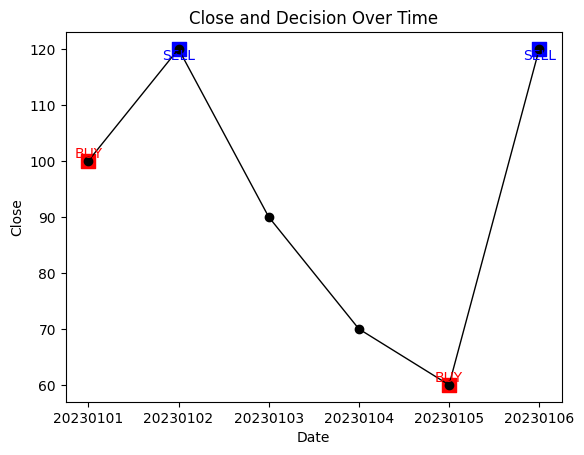

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

class ResultPrinter:
    def __init__(self):
        self.date = []
        self.decision = []
        self.close = []
        self.result = {}

    def set_data(self, date, decision, close):
        self.date.append(date)
        self.decision.append(decision)
        self.close.append(close)
        self.result = dict(zip(tuple(self.date), tuple(self.decision)))

        print("--지금까지 매수/매도 결정 리스트--")
        for k, v in self.result.items():
            if v != None:
                print(k, ":", v)
        print()

    def get_result(self):
        return self.result

    def save_to_csv(self, filename):

        df = pd.DataFrame(list(self.result.items()), columns=['Date', 'Decision'])
        df.to_csv(filename, index=False)
        print(f"Result saved to {filename}")

    def load_from_csv(self, filename):
        df = pd.read_csv(filename)
        self.result = dict(zip(df['Date'], df['Decision']))
        print(f"Result loaded from {filename}")

    def plot_graph(self):
        # CSV로 저장
        self.save_to_csv('result.csv')

        x_values = self.date
        y_values_close = self.close
        colors = []

        # Assigning colors based on decision values
        for value in self.decision:
            if value is True:
                colors.append('red')
            elif value is False:
                colors.append('blue')
            else:
                colors.append('gray')  # or any color for 'Pass'

        plt.plot(x_values, y_values_close, label='Close', color='black', marker='o', linestyle='-', linewidth=1)

        for i, color in enumerate(colors):
            if color != 'gray':  # Only plot if not 'Pass'
                plt.scatter(x_values[i], y_values_close[i], c=color, marker='s', label='Decision', s=100)

        for i, value in enumerate(self.decision):
            if value is True:
                plt.text(x_values[i], y_values_close[i], 'BUY', color='red', ha='center', va='bottom')
            elif value is False:
                plt.text(x_values[i], y_values_close[i], 'SELL', color='blue', ha='center', va='top')

        plt.xlabel('Date')
        plt.ylabel('Close')
        plt.title('Close and Decision Over Time')
        plt.show()
# 예시 사용
if __name__ == "__main__":
    # 예시 데이터
    date_list = ['20230101', '20230102', '20230103', '20230104', '20230105', '20230106']
    decision_list = [True, False, None, None, True,False]  # Adding None for Pass
    close_list = [100, 120, 90, 70, 60, 120]

    # ResultPrinter 인스턴스 생성
    result_printer = ResultPrinter()
    for i in range(len(date_list)):
        result_printer.set_data(date_list[i],decision_list[i],close_list[i])

    # 결과 출력
    print("Result:", result_printer.get_result())

    # CSV로 저장
    result_printer.save_to_csv('result.csv')

    # CSV 불러오기
    result_printer.load_from_csv('result.csv')

    # 그래프 그리기
    result_printer.plot_graph()

data: 20201119

highs_datas : []
lows_datas : []

------------------high----------------------

-------------------low----------------------

--지금까지 매수/매도 결정 리스트--

---현재 자산--
보유 주식 수: {0} 현재 자산 : {10000000}

--금일 결정--
돈 퍼센트(%): -1.0 | 매도/매수: None

data: 20201120

highs_datas : [64600]
lows_datas : [64100]

------------------high----------------------

-------------------low----------------------

--지금까지 매수/매도 결정 리스트--

---현재 자산--
보유 주식 수: {0} 현재 자산 : {10000000}

--금일 결정--
돈 퍼센트(%): -1.0 | 매도/매수: None

data: 20201123

highs_datas : [64600, 64700]
lows_datas : [64100, 63900]

------------------high----------------------

[0 1]
[6.46 6.47]
    0|   -3.4763|    2.1802| 39.520863
10000|   -0.0034|    6.4683|  0.000047


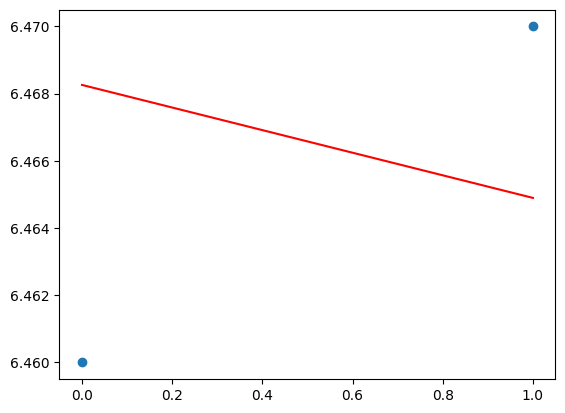


predict: 64615.426 | data: 67500 | rate: 4.464219

-------------------low----------------------

[0 1]
[6.41 6.39]
    0|  -12.1892|    1.0114|169.726654
10000|   -0.1601|    6.4966|  0.005184


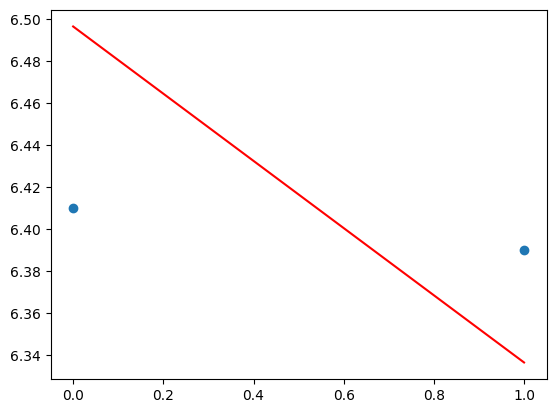


predict: 61763.926 | data: 64800 | rate: 4.915611

initial assets : 10000000
 매수 예정 금액 : 10000000 실제 매수 금액: 9990000 원, 보유 주식 수: 148, 현재 자산 : 10000
--지금까지 매수/매도 결정 리스트--
20201123 : True

---현재 자산--
보유 주식 수: {148} 현재 자산 : {10000}

--금일 결정--
돈 퍼센트(%): 100 | 매도/매수: True

data: 20201124

highs_datas : [67500]
lows_datas : [64800]

------------------high----------------------

-------------------low----------------------

--지금까지 매수/매도 결정 리스트--
20201123 : True

---현재 자산--
보유 주식 수: {148} 현재 자산 : {10000}

--금일 결정--
돈 퍼센트(%): -1.0 | 매도/매수: None

data: 20201125

highs_datas : [67500, 67900]
lows_datas : [64800, 67700]

------------------high----------------------

[0 1]
[6.75 6.79]
    0|  -19.2933|   12.2929|110.707886
10000|   -0.3210|    6.9731|  0.034418


KeyboardInterrupt: ignored

In [7]:
class MainFlow():
  def __init__(self) -> None:
    self.finance_manager = FinanceManager()
    self.flag_pattern = FlagPattern()
    self.decide = Decide()
    self.wallet_manager = WalletManager()
    self.result_printer = ResultPrinter()

    self.data_init()
    self.data_dict = {}

  def data_init(self):
    df = self.finance_manager.get_sise_years('005930')
    df = self.finance_manager.list_to_df(df)
    self.finance_manager.save_to_csv(df, 'stock_data.csv')

    self.flag_pattern.set_minimum(2)#선형회귀 시작 최소 데이터 개수
    self.flag_pattern.set_same_rate(2.0)#예측값과 현재값의 차이 임계값(매수/매도 결정)

    self.date_datas = self.finance_manager.get_datas("날짜")
    self.high_datas = self.finance_manager.get_datas("고가")
    self.low_datas = self.finance_manager.get_datas("저가")
    self.close_datas = self.finance_manager.get_datas("종가")
    self.open_datas = self.finance_manager.get_datas("시가")

  def compare_data(self, data1, data2):
    if data1 > data2:
      return data1, data2
    else:
      return data2, data1

  def run(self):
    for i in range(len(self.date_datas)):
      print("===================================================")
      print("data:", self.date_datas[i])

      #-----------------------------------------------------------
      high, low = self.compare_data(self.close_datas[i], self.open_datas[i])
      is_match, _ = self.flag_pattern.pattern_match(high, low)
      #is_match, _ = self.flag_pattern.pattern_match(self.high_datas[i], self.low_datas[i])
      money_percent, is_buy = self.decide.get_decide(self.close_datas[i], is_match)
      self.wallet_manager.market_watch(money_percent, is_buy, self.close_datas[i])
      self.result_printer.set_data(self.date_datas[i],is_buy,self.close_datas[i])
      #-----------------------------------------------------------

      self.wallet_manager.print_current_info()
      print()
      print("--금일 결정--")
      print("돈 퍼센트(%):",money_percent,"| 매도/매수:", is_buy)
      print()


    self.result_printer.plot_graph()
    self.wallet_manager.get_yield()


if __name__ == "__main__":
  main_flow = MainFlow()
  main_flow.run()